### Task (2) Data Understanding

In [2]:
# Import libraries
import pandas as pd

In [4]:
# Import Data via CSV
data = pd.read_csv("/workspace/data/raw/Breast_Cancer_Mortality_Survival_Dataset.csv")

In [5]:
drop_columns = ['Patient ID', 'Month of Birth', 'Occupation Code', 'Adopted Status']

In [6]:
data_drop = data.drop(columns=drop_columns)

In [7]:
data_drop

,Age,Sex,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
0,68.0,Female,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60,Alive
1,50.0,Female,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62,Alive
2,58.0,Female,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75,Alive
3,58.0,Female,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,84,Alive
4,47.0,Female,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62.0,Female,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9.0,Positive,Positive,1,1,49,Alive
4020,56.0,Female,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46.0,Positive,Positive,14,8,69,Alive
4021,68.0,Female,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22.0,Positive,Negative,11,3,69,Alive
4022,58.0,Female,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44.0,Positive,Positive,11,1,72,Alive


In [8]:
# Loop and change string data into categorical data
string_columns = [
    'Sex', 
    'Race', 
    'Marital Status', 
    'T Stage', 
    'N Stage', 
    '6th Stage', 
    'differentiate', 
    'A Stage', 
    'Estrogen Status',
    'Progesterone Status',
    'Mortality_Status'
    ]

for col in string_columns:
    data_drop[col] = data_drop[col].astype('category')


In [9]:
data_drop.describe()

,Age,Grade,Tumor Size,Survival Months
count,4015.000000,4024.000000,4021.000000,4024.000000
mean,54.094396,2.150596,30.419299,71.472167
std,11.417118,0.638234,21.161080,25.361855
min,30.000000,1.000000,-75.000000,1.000000
25%,47.000000,2.000000,16.000000,56.000000
50%,54.000000,2.000000,25.000000,73.000000
75%,61.000000,3.000000,38.000000,90.000000
max,502.000000,4.000000,140.000000,760.000000


In [10]:
# Create labels for categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in string_columns:
    data_drop[col] = le.fit_transform(data_drop[col])

In [11]:
# Run describe with the new labels
data_drop.describe()

,Age,Sex,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Mortality_Status
count,4015.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4021.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,54.094396,0.019135,1.775845,1.371272,0.784791,0.438370,1.321819,0.690358,2.150596,0.977137,30.419299,0.933151,0.826541,71.472167,1.312376
std,11.417118,0.137017,0.564465,1.063637,0.765531,0.693479,1.266624,1.016418,0.638234,0.149485,21.161080,0.249791,0.378691,25.361855,0.743577
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-75.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,16.000000,1.000000,1.000000,56.000000,1.000000
50%,54.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,25.000000,1.000000,1.000000,73.000000,1.000000
75%,61.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,90.000000,1.000000
max,502.000000,1.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,4.000000,1.000000,140.000000,1.000000,1.000000,760.000000,6.000000


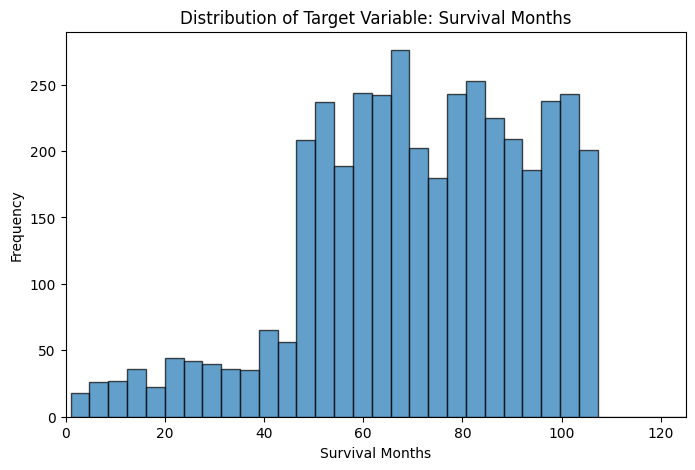

In [12]:
# Plot the Distribution of the traget variable 'Survival Months'
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(data_drop['Survival Months'], bins = 200, edgecolor = 'k', alpha = 0.7)
plt.title(f'Distribution of Target Variable: Survival Months')
plt.xlabel('Survival Months')
plt.xlim(0, 125)  # Adjust based on the range of interest
plt.ylabel('Frequency')
plt.show()

### Task (3) Data Preparation

In [13]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4015 non-null   float64
 1   Sex                     4024 non-null   int64  
 2   Race                    4024 non-null   int64  
 3   Marital Status          4024 non-null   int64  
 4   T Stage                 4024 non-null   int64  
 5   N Stage                 4024 non-null   int64  
 6   6th Stage               4024 non-null   int64  
 7   differentiate           4024 non-null   int64  
 8   Grade                   4024 non-null   int64  
 9   A Stage                 4024 non-null   int64  
 10  Tumor Size              4021 non-null   float64
 11  Estrogen Status         4024 non-null   int64  
 12  Progesterone Status     4024 non-null   int64  
 13  Regional Node Examined  4023 non-null   object 
 14  Reginol Node Positive   4024 non-null   

In [14]:
data_drop

,Age,Sex,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
0,68.0,0,2,1,0,0,0,1,3,1,4.0,1,1,24,1,60,1
1,50.0,0,2,1,1,1,2,0,2,1,35.0,1,1,14,5,62,1
2,58.0,0,2,0,2,2,4,0,2,1,63.0,1,1,14,7,75,1
3,58.0,0,2,1,0,0,0,1,3,1,18.0,1,1,2,1,84,1
4,47.0,0,2,1,1,0,1,1,3,1,41.0,1,1,3,1,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62.0,0,1,1,0,0,0,0,2,1,9.0,1,1,1,1,49,1
4020,56.0,0,2,0,1,1,2,0,2,1,46.0,1,1,14,8,69,1
4021,68.0,0,2,1,1,0,1,0,2,1,22.0,1,0,11,3,69,1
4022,58.0,0,0,0,1,0,1,0,2,1,44.0,1,1,11,1,72,1
